In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("Cirrhosis Patient Survival Prediction/cirrhosis.csv")
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [8]:
data.nunique()

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,418.0,NaN,NaN,NaN,209.5,120.810458,1.0,105.25,209.5,313.75,418.0
N_Days,418.0,NaN,NaN,NaN,1917.782297,1104.672992,41.0,1092.75,1730.0,2613.5,4795.0
Status,418,3,C,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drug,312,2,D-penicillamine,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,418.0,NaN,NaN,NaN,18533.351675,3815.845055,9598.0,15644.5,18628.0,21272.5,28650.0
Sex,418,2,F,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ascites,312,2,N,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatomegaly,312,2,Y,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spiders,312,2,N,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,418,3,N,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')
Numerical Variables:
['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


ID
Skew : 0.0


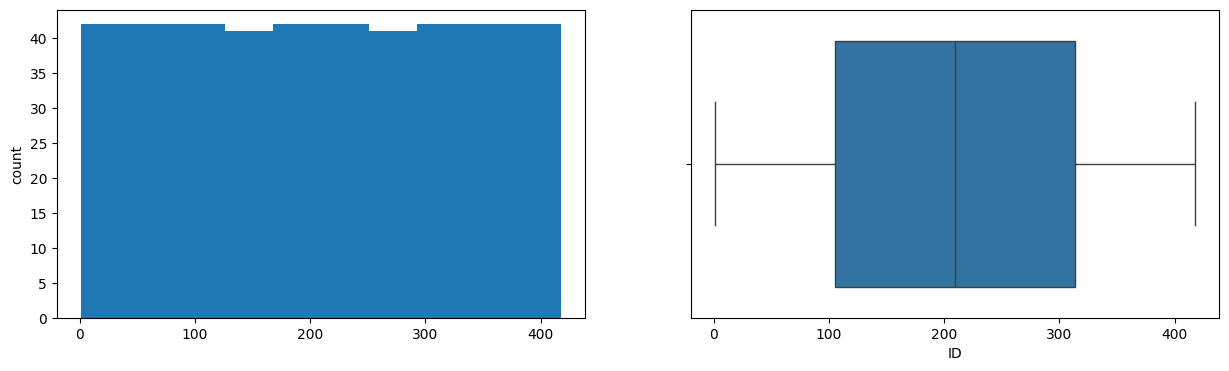

N_Days
Skew : 0.47


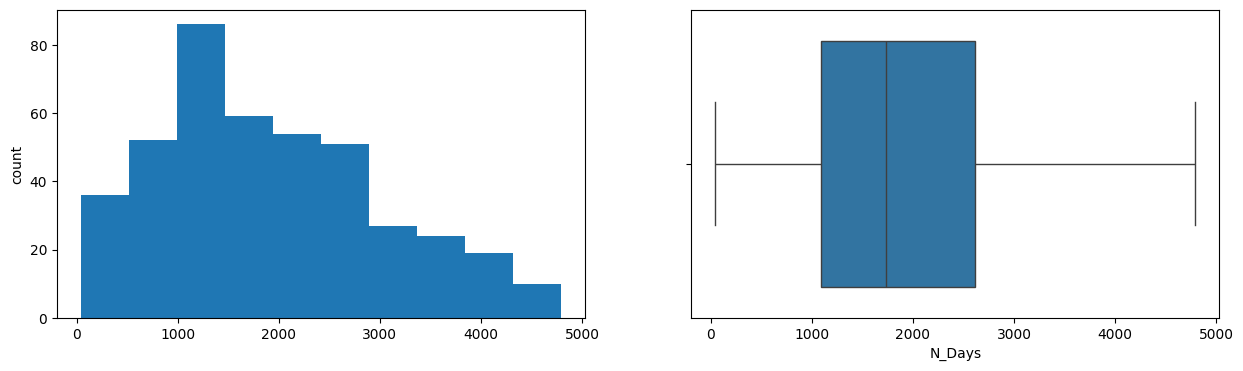

Age
Skew : 0.09


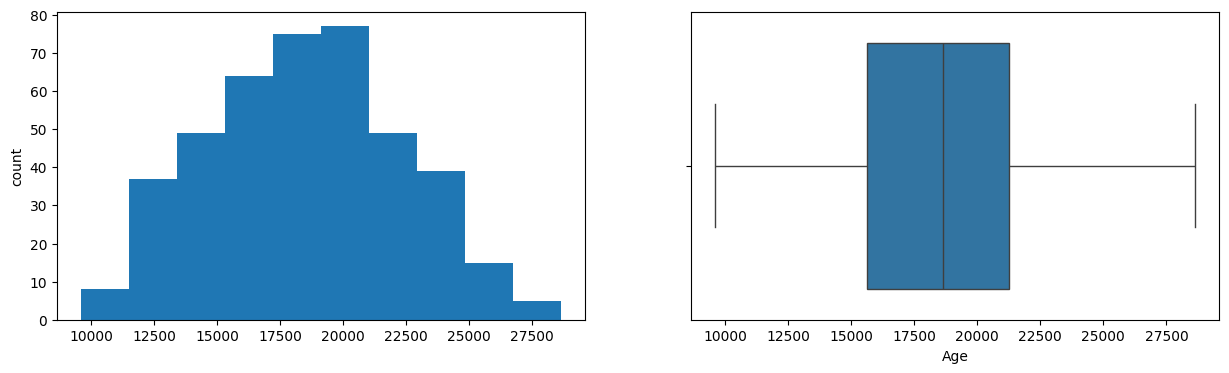

Bilirubin
Skew : 2.72


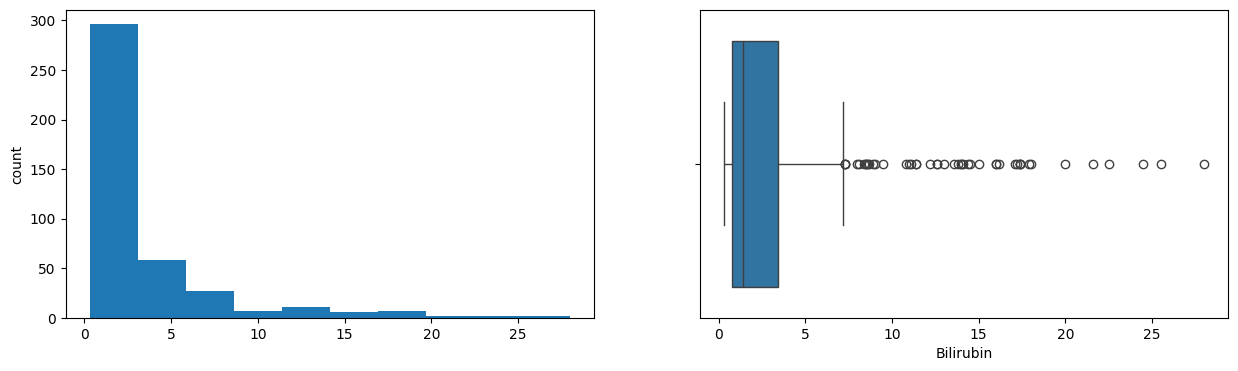

Cholesterol
Skew : 3.41


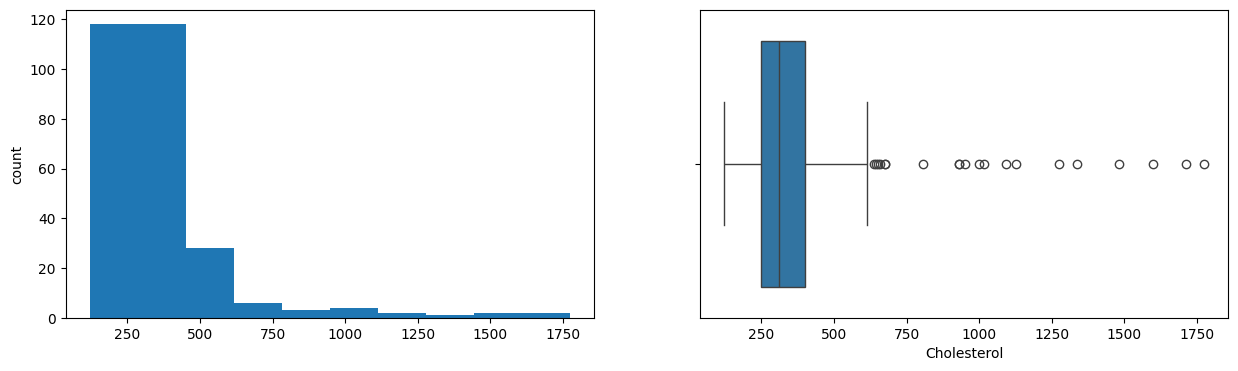

Albumin
Skew : -0.47


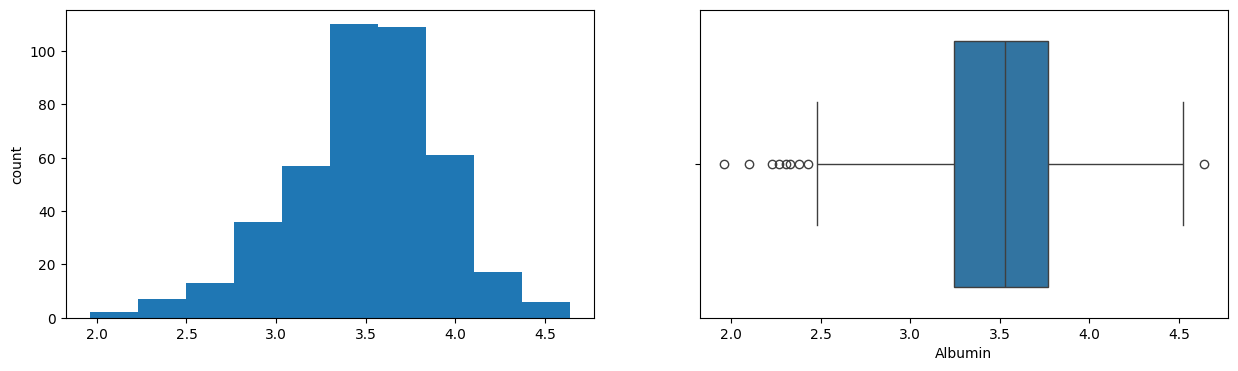

Copper
Skew : 2.3


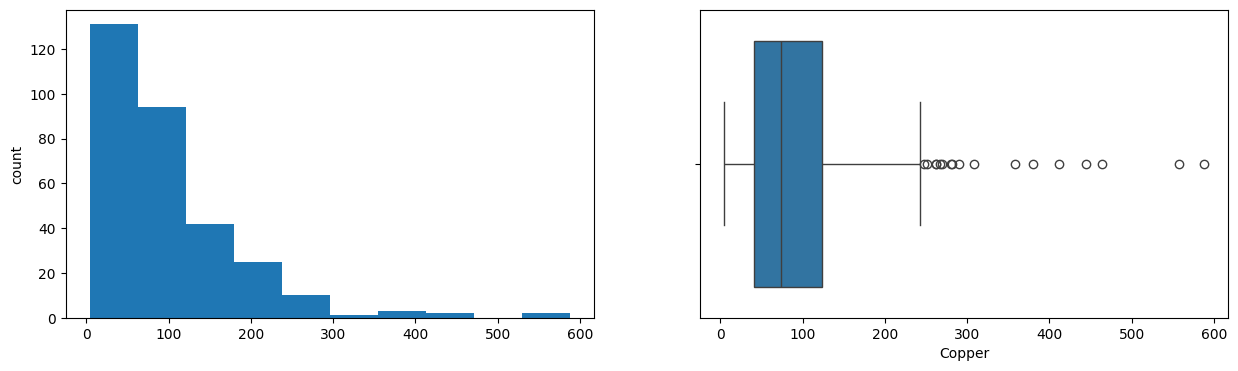

Alk_Phos
Skew : 2.99


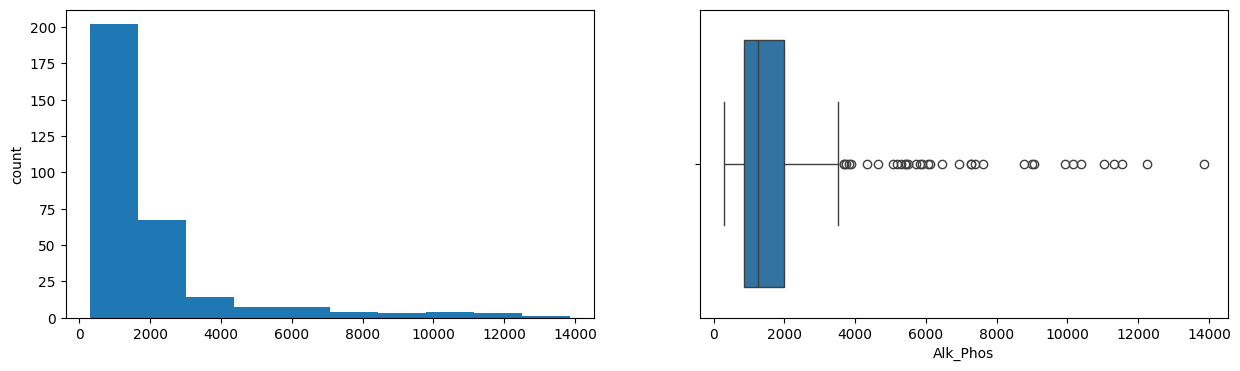

SGOT
Skew : 1.45


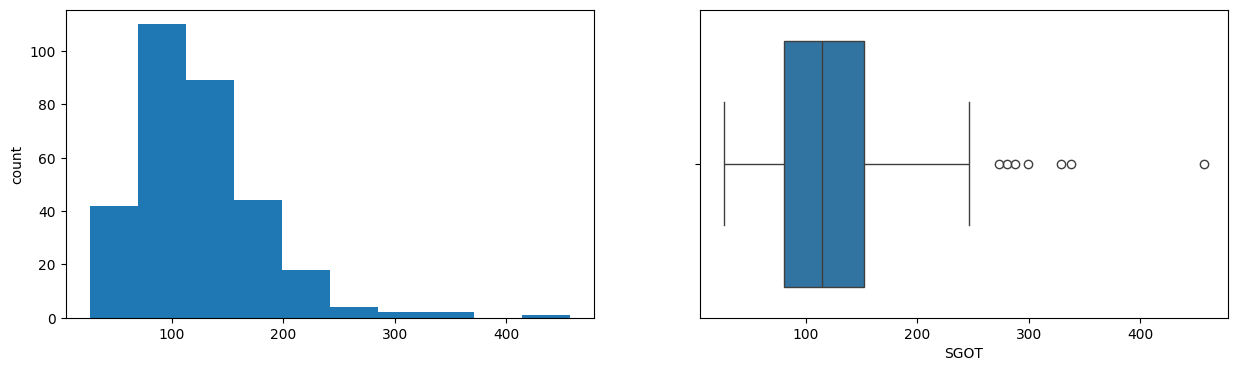

Tryglicerides
Skew : 2.52


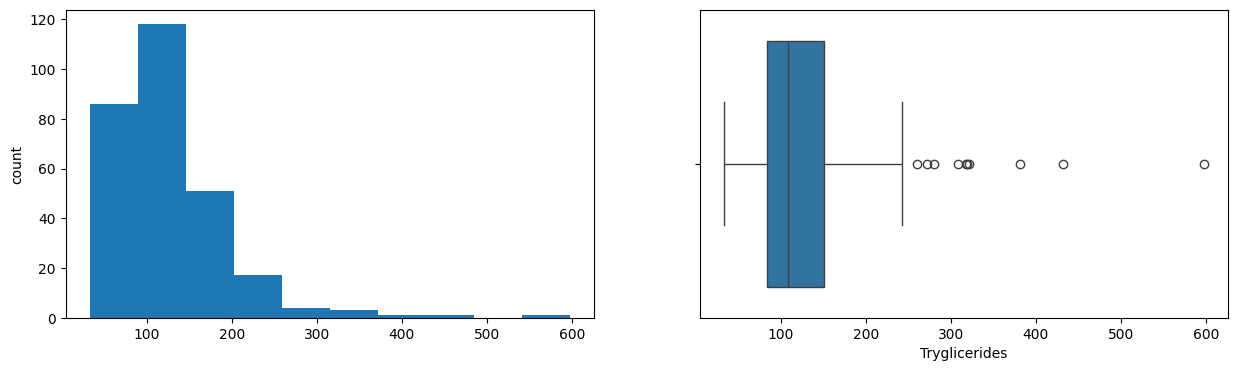

Platelets
Skew : 0.63


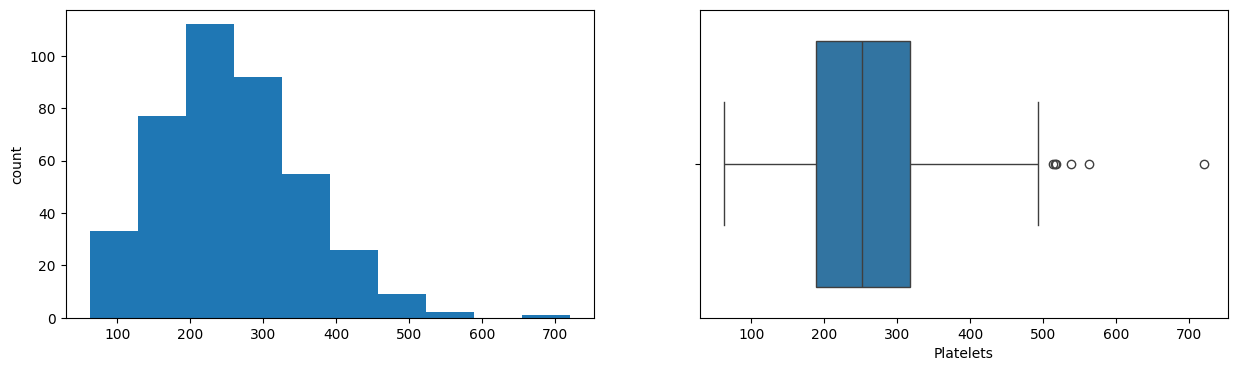

Prothrombin
Skew : 2.22


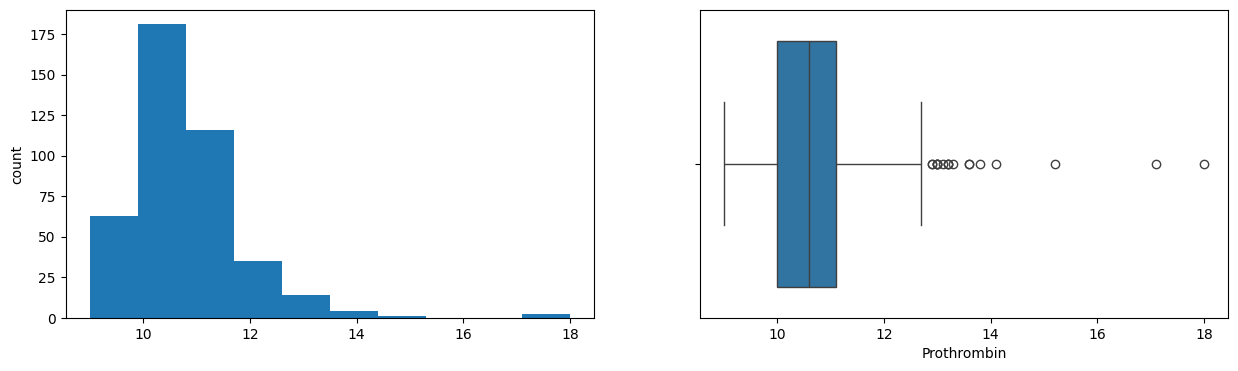

Stage
Skew : -0.5


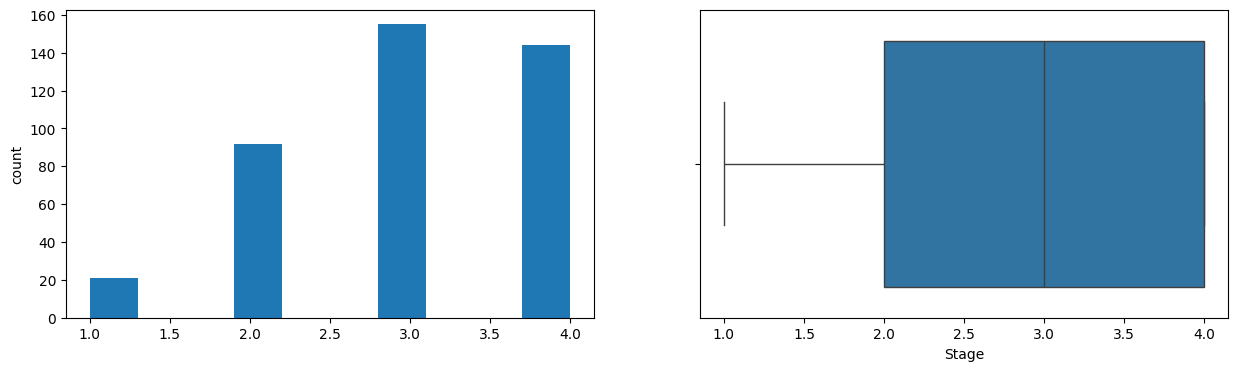

In [13]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [14]:
data.shape()

TypeError: 'tuple' object is not callable

In [15]:
data.shape

(418, 20)

In [16]:
data.isnull()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
414,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
415,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
416,False,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False


In [17]:
data.isnull().sum()


ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [26]:

data.fillna(value=np.nan,inplace=True)
data['Drug']=data.groupby(['N_Days','Status'])['Drug'].apply(lambda x:x.fillna(x.median()))
data['Ascites']=data.groupby(['N_Days','Status])['Ascites'].apply(lambda x:x.fillna(x.median()))
data['Hepatomegaly']=data.groupby(['N_Days','Status'])['Hepatomegaly'].apply(lambda x:x.fillna(x.median()))
data['Spiders']=data.groupby(['N_Days','Status'])['Spiders'].apply(lambda x:x.fillna(x.median()))
data['Copper']=data.groupby(['N_Days','Status'])['Copper'].apply(lambda x:x.fillna(x.median()))
data['Cholesterol']=data.groupby(['N_Days','Status'])['Cholesterol'].apply(lambda x:x.fillna(x.median()))
data['Alk_Phos']=data.groupby(['N_Days','Status'])['Alk_Phos'].apply(lambda x:x.fillna(x.median()))
data['SGOT']=data.groupby(['N_Days','Status'])['SGOT'].apply(lambda x:x.fillna(x.median()))
data['Tryglicerides']=data.groupby(['N_Days','Status'])['Tryglicerides'].apply(lambda x:x.fillna(x.median()))
data['Platelets']=data.groupby(['N_Days','Status'])['Platelets'].apply(lambda x:x.fillna(x.median()))
data['Prothrombin']=data.groupby(['N_Days','Status'])['Prothrombin'].apply(lambda x:x.fillna(x.median()))
data['Stage']=data.groupby(['N_Days','Status'])['Stage'].apply(lambda x:x.fillna(x.median()))

TypeError: could not convert string to float: 'D-penicillamine'

In [25]:
min(data['N_Days'])


41